## Mini PJT

- 해당 데이터를 고객 단위로 묶자.


- 데이터를 정제해서, 월별/고객별로 재정렬이 필요 (aggregation)


- row가 고객별 데이터로 묶이고 난 다음, 고객들을 유형별로 나눠보자.


- 여러 가지 클러스터링 알고리즘을 사용하여, 결과를 테스트 ㄱㄱ

### 1. 데이터 불러오기

In [3]:
# instacart 데이터를 모두 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "/Users/myeongjinlee/Desktop/kaggle/kaggle/Instacart Market Basket Analysis/data/"
aisles = pd.read_csv(base_path + "aisles.csv") #매대 코너 종류
departments = pd.read_csv(base_path + "departments.csv")
prior = pd.read_csv(base_path + "order_products__prior.csv")
train = pd.read_csv(base_path + "order_products__train.csv")
orders = pd.read_csv(base_path + "orders.csv")
products = pd.read_csv(base_path + "products.csv")

In [6]:
print(aisles.shape, departments.shape,prior.shape, train.shape,orders.shape,products.shape)

(134, 2) (21, 2) (32434489, 4) (1384617, 4) (3421083, 7) (49688, 4)


In [7]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [8]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
prior # jonna 많다

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [10]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [11]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
# 고객을 정의해야함.(유저별로 정리해야하니깐 id 기준으로 ㄱ, 구매빈도로 나눠보자)

In [12]:
# 데이터 너무 많으니 일단 만 개로 줄이자

prior_sample =prior[:10000]
prior_sample

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
9995,1022,21903,1,1
9996,1022,38689,2,1
9997,1022,30391,3,1
9998,1022,18670,4,1


In [13]:
# 불러온 모든 테이블을 합치자.
temp = pd.merge(orders, prior_sample, on="order_id")
temp = pd.merge(temp, products, on="product_id")
temp = pd.merge(temp, aisles, on="aisle_id")
temp = pd.merge(temp, departments, on="department_id")
temp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,40,382,prior,29,1,15,23.0,10070,1,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
1,235,58701,prior,20,5,9,9.0,10070,7,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
2,581,76141,prior,3,6,17,7.0,10070,3,0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
3,649,135836,prior,1,4,7,NaN,10070,1,0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
4,40,382,prior,29,1,15,23.0,34866,4,1,Chocolate Milk 1% Milkfat,84,16,milk,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,152,103040,prior,12,1,10,7.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9996,959,119941,prior,2,6,13,21.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9997,400,180454,prior,32,0,8,8.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9998,18,118860,prior,3,4,20,6.0,1000,3,0,Apricots,18,10,bulk dried fruits vegetables,bulk


### 2. EDA

In [14]:
# 1만개의 거래내역에 대해서 각 물품을 얼마나 샀을까?
temp.user_id.value_counts() #972명의 고객 

149156    46
150739    45
11335     44
119437    39
87889     38
          ..
36916      1
99415      1
160167     1
15161      1
154766     1
Name: user_id, Length: 972, dtype: int64

In [15]:
temp.product_name.value_counts() # 하나의 프로덕트를 몇 개 샀는지는 안나옴.

Banana                               156
Bag of Organic Bananas               119
Organic Strawberries                  73
Organic Baby Spinach                  70
Organic Hass Avocado                  68
                                    ... 
Organic Bunch Arugula                  1
Russet Potatoes                        1
Organic Whole Crimini Mushrooms        1
Yukon Gold Potatoes                    1
Organic Short Brown Sprouted Rice      1
Name: product_name, Length: 4511, dtype: int64

In [16]:
temp.aisle.value_counts()

fresh fruits                    1128
fresh vegetables                1076
packaged vegetables fruits       514
yogurt                           395
packaged cheese                  313
                                ... 
first aid                          2
beauty                             1
eye ear care                       1
skin care                          1
bulk grains rice dried goods       1
Name: aisle, Length: 133, dtype: int64

In [17]:
temp.department.value_counts() #식재료를 많이 사긴하네

produce            2913
dairy eggs         1647
snacks              862
beverages           801
frozen              746
pantry              598
canned goods        362
bakery              354
deli                319
dry goods pasta     255
household           249
breakfast           238
meat seafood        225
babies              131
personal care       125
international        86
pets                 28
alcohol              27
missing              15
other                13
bulk                  6
Name: department, dtype: int64

In [18]:
temp.order_dow.value_counts() #아마 1,0이 주말일듯

1    2135
0    1916
5    1346
6    1333
2    1324
3    1081
4     865
Name: order_dow, dtype: int64

In [19]:
temp.order_hour_of_day.value_counts() #12~13 점심시간에 가장 많이 구매(온라인 쇼핑몰임)

12    903
13    821
9     818
16    815
10    813
11    793
15    775
17    771
14    706
8     601
18    546
20    373
19    335
7     231
22    175
21    172
23    134
6      95
0      76
1      26
4      16
2       5
Name: order_hour_of_day, dtype: int64

### 3. 데이터 전처리

- 데이터를 transaction 단위로 변경

- 각자의 방법대로 데이터의 단위를 정하자.


> User 단위로 어떤 물품을 구매했는지의 정보만 가지는 feature vector로 변환한다. e.g. pd.crosstab, CountVectorizer

In [20]:
# transaction->user-level 단위로 변경하고, User당 정보로 변환하는 과정까지 마무리합니다.
# 1. Department(v)     2. Aisle      3. Product_name

X = pd.crosstab(index=temp.user_id, columns=temp.department) 
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


### 4. 클러스터링 모델 적용하기

- 사용하는 클러스터링 모델은 KMeans
(AgglomerativeClustering, DBSCAN, SpectralClustering 시간이 매우매우 오래 걸릴수 있으니 주의..)

**[K-Means]**

- Elbow method를 이용하여 최적의 K값을 찾아보세요.


- sparse한 특징을 가지는 데이터를 클러스터링 하기 위해서는 어떤 기법을 사용해야 할까요?


- 클러스터링 결과를 시각화해보고, 실루엣 지수도 계산해봅시다.

In [21]:
# data setting
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# tSNE : 시각화용도의 차원감소 기법. (2차원으로 변환해주는 기법)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2) #시각화할거니 2차원으로 
tsne_data = tsne.fit_transform(X)
tsne_data

array([[-21.508139  ,  12.463773  ],
       [  8.88538   ,  23.928915  ],
       [-21.41047   ,  -3.2893128 ],
       ...,
       [-10.37451   ,  -0.15018563],
       [-21.169613  ,  17.859167  ],
       [ 12.00195   ,   6.5816865 ]], dtype=float32)

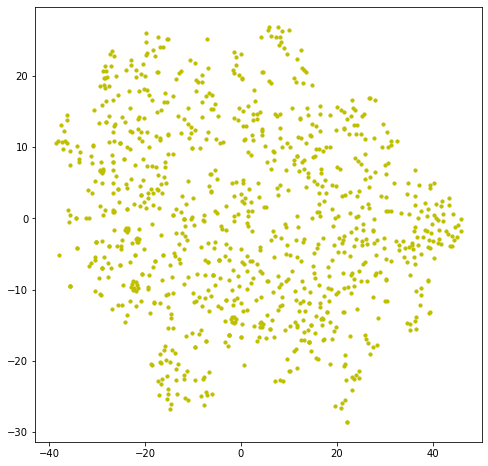

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c='y')
plt.show()

In [29]:
# K-means를 돌려보자
from sklearn.cluster import KMeans                    # 1. K-means
from sklearn.cluster import AgglomerativeClustering   # 2. Hierarchical Agglomerative Clustering
from sklearn.cluster import DBSCAN                    # 3. DBSCAN
from sklearn.cluster import SpectralClustering        # 4. Spectral Clustering

from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=4)
model2 = KMeans(n_clusters=2)
# unsupervised setting
pred = model.fit_predict(X)
pred2 = model2.fit_predict(X)
print("Silhouette Score : %.4f" % silhouette_score(X, pred))#n_clusters = 4
print("Silhouette Score : %.4f" % silhouette_score(X, pred2))#n_clusters = 2 

Silhouette Score : 0.1910
Silhouette Score : 0.3641


/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
# elbow method
sse = []
silhouettes = []

for K in range(2, 11):
  model = KMeans(n_clusters=K) # K : 2 ~ 10
  pred = model.fit_predict(X)
  sse.append(model.inertia_) # SSE
  silhouettes.append(silhouette_score(X, pred))

/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

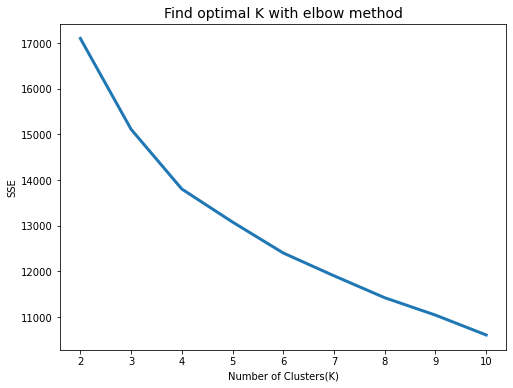

In [31]:
# 최적의 K는 어떻게 구할까요?
# Elbow method : 정해진 K에 대해서 SSE를 계산한 다음, SSE가 가장 많이 꺾이는 K(elbow)가 optimal K라고 판단하는 방법.

plt.figure(figsize=(8, 6))
plt.title("Find optimal K with elbow method", fontsize=14)
plt.xlabel("Number of Clusters(K)", fontsize=10)
plt.ylabel("SSE", fontsize=10)
plt.plot(range(2, 11), sse, lw=3)
plt.show() #4정도가 베스트 케이스라는 거 확인가능

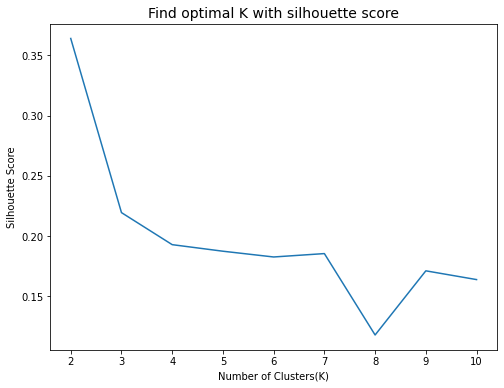

In [ ]:
# Silhouette score : 같은 클러스터에 속하는 데이터중 가장 먼 데이터와의 거리와 다른 클러스터에 속하는 데이터 중 가장 가까운 데이터와의 거리 비율을 계산한 지표. [-1, 1]
# Reference : https://en.wikipedia.org/wiki/Silhouette_(clustering)

plt.figure(figsize=(8, 6))
plt.title("Find optimal K with silhouette score", fontsize=14)
plt.xlabel("Number of Clusters(K)", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.plot(range(2, 11), silhouettes)
plt.show() # 엘보우는 4, 실루엣은 2 가 베스트인데 UL이기에 뭐가 ㄹㅇ 베스트인지는 모름.

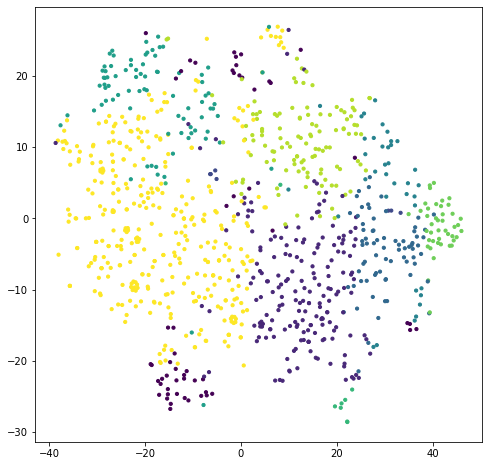

In [33]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c=pred, cmap="viridis")
plt.show()

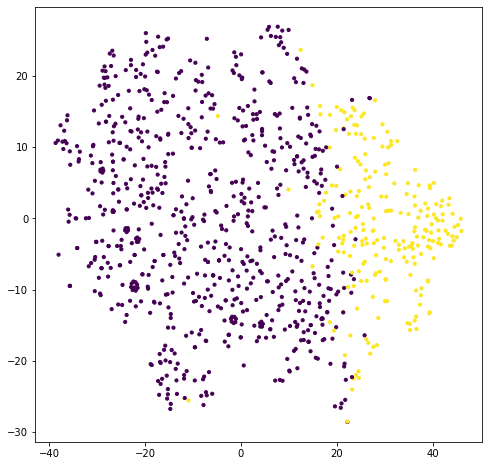

In [34]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c=pred2, cmap="viridis")
plt.show()

In [35]:
# see summary(잘됐는지 확인하려면 우리의 데이터 x에서 각 클러스터 라벨이 들어가있는 애들기리 묶어서 value count)
X["cluster_label"] = pred2
X["Cluster_label"] = pred
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,cluster_label,Cluster_label
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,9
503,0,0,0,0,1,0,2,1,0,0,...,1,0,0,1,0,0,2,0,0,9
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,9
1059,0,0,3,0,3,0,0,8,0,0,...,2,0,0,2,0,0,8,2,1,4
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,2,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,4,1,0,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,0,0,9


In [37]:
group1 = X.loc[X.Cluster_label == 0, :]
group2 = X.loc[X.Cluster_label == 1, :]
group3 = X.loc[X.Cluster_label == 2, :]
group4 = X.loc[X.Cluster_label == 3, :]
print(group1.shape, group2.shape, group3.shape, group4.shape)

(56, 23) (186, 23) (7, 23) (72, 23)


In [38]:
group1.mean()

department
alcohol            0.017857
babies             0.071429
bakery             0.500000
beverages          0.750000
breakfast          0.500000
bulk               0.017857
canned goods       0.267857
dairy eggs         1.964286
deli               0.303571
dry goods pasta    0.285714
frozen             3.964286
household          0.375000
international      0.142857
meat seafood       0.196429
missing            0.089286
other              0.000000
pantry             0.910714
personal care      0.464286
pets               0.142857
produce            1.785714
snacks             1.339286
cluster_label      0.125000
Cluster_label      0.000000
dtype: float64

In [39]:
group2.mean()

department
alcohol            0.021505
babies             0.032258
bakery             0.338710
beverages          0.462366
breakfast          0.161290
bulk               0.000000
canned goods       0.344086
dairy eggs         0.930108
deli               0.354839
dry goods pasta    0.220430
frozen             0.370968
household          0.225806
international      0.086022
meat seafood       0.231183
missing            0.016129
other              0.010753
pantry             0.537634
personal care      0.064516
pets               0.016129
produce            3.983871
snacks             0.629032
cluster_label      0.155914
Cluster_label      1.000000
dtype: float64

In [40]:
group3.mean()

department
alcohol            0.000000
babies             7.714286
bakery             0.571429
beverages          1.142857
breakfast          0.142857
bulk               0.000000
canned goods       0.285714
dairy eggs         2.285714
deli               0.857143
dry goods pasta    0.285714
frozen             1.714286
household          0.000000
international      0.285714
meat seafood       0.285714
missing            0.142857
other              0.000000
pantry             0.571429
personal care      0.000000
pets               0.000000
produce            4.428571
snacks             0.285714
cluster_label      0.428571
Cluster_label      2.000000
dtype: float64

In [41]:
group4.mean()

department
alcohol            0.013889
babies             0.152778
bakery             0.347222
beverages          0.569444
breakfast          0.250000
bulk               0.013889
canned goods       0.750000
dairy eggs         1.708333
deli               0.388889
dry goods pasta    0.347222
frozen             0.861111
household          0.097222
international      0.125000
meat seafood       0.388889
missing            0.000000
other              0.013889
pantry             0.652778
personal care      0.125000
pets               0.013889
produce            7.319444
snacks             0.472222
cluster_label      1.000000
Cluster_label      3.000000
dtype: float64